# Brain Stroke Prediction using different AI algorithms


### Import all the impotant libraries for Mathmatical and I/O operations


In [173]:
import pandas as pd
import numpy as np

### Import all the impotant libraries for plotting the curves


In [174]:
import seaborn as sns
import matplotlib as plt
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#### Load the data set


In [175]:
data = pd.read_csv("Dataset/healthcare-dataset-stroke-data.csv")

In [176]:
data.shape

(5110, 12)

In [177]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data analysis


In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [179]:
# We can see that only BMI column has null values.
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [180]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [181]:
# We wull fill the null values with mean values
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [182]:
data['bmi'].sum()

147644.44061927072

In [183]:
# Drop some unnecessary features like id which does'nt have any role in heart stroke
data.drop('id', axis=1, inplace=True)

In [184]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [185]:
data.iplot(kind="box", theme="space", title="Check The outliers")
# There are outliers but as we can see number of outliers are so much that we can not drop them.

In [186]:
# This thing that we need to observe is changing values of average glucose level this means it has outliers.
data['avg_glucose_level'].describe()

# But we can keep them because there are a lot of outlier behaviour and we can not drop or delete all of them

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

# Label Encoding


In [187]:
data.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1


In [188]:
# We can do either hot encoding or label encoding
# Convert labels or objects to numbers(integers or floats)
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [189]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['work_type'] = label_encoder.fit_transform(data['work_type'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


# Partitioning


In [191]:
# Spliting the data for train and test
# We will keep the ratio of 80/20
from sklearn.model_selection import train_test_split
X = data.drop('stroke', axis=1)
Y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=101)

In [192]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 3831 to 4959
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4088 non-null   int64  
 1   age                4088 non-null   float64
 2   hypertension       4088 non-null   int64  
 3   heart_disease      4088 non-null   int64  
 4   ever_married       4088 non-null   int64  
 5   work_type          4088 non-null   int64  
 6   Residence_type     4088 non-null   int64  
 7   avg_glucose_level  4088 non-null   float64
 8   bmi                4088 non-null   float64
 9   smoking_status     4088 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 351.3 KB


In [193]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 5031 to 4634
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1022 non-null   int64  
 1   age                1022 non-null   float64
 2   hypertension       1022 non-null   int64  
 3   heart_disease      1022 non-null   int64  
 4   ever_married       1022 non-null   int64  
 5   work_type          1022 non-null   int64  
 6   Residence_type     1022 non-null   int64  
 7   avg_glucose_level  1022 non-null   float64
 8   bmi                1022 non-null   float64
 9   smoking_status     1022 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 87.8 KB


In [194]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 4088 entries, 3831 to 4959
Series name: stroke
Non-Null Count  Dtype
--------------  -----
4088 non-null   int64
dtypes: int64(1)
memory usage: 63.9 KB


In [195]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 1022 entries, 5031 to 4634
Series name: stroke
Non-Null Count  Dtype
--------------  -----
1022 non-null   int64
dtypes: int64(1)
memory usage: 16.0 KB


# Normalization


In [196]:
# Narmalization process is all about giving whole data a perticular range instead of their scattering nature
# We will make standard devisition to be 1 and mean to be 0
# We don't need to normalize the Y_test and Y_train because they are already in 0 or 1.
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [197]:
std

StandardScaler()

In [198]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [199]:
import pickle
with open('model/scaler.pkl', 'wb') as f:
    pickle.dump(std, f)
# with open('file/path/scaler.pkl','rb') as f:
#     sc = pickle.load(f)

In [200]:
X_test_std

array([[-0.84884552, -1.05095916, -0.3275041 , ...,  0.30965617,
        -1.55695909,  0.56077275],
       [-0.84884552,  0.01475877, -0.3275041 , ...,  0.14353395,
         0.20026784,  1.50649841],
       [-0.84884552,  1.21369144,  3.05339685, ...,  2.09188378,
         0.34451781,  0.56077275],
       ...,
       [-0.84884552,  0.63642756, -0.3275041 , ...,  0.92440091,
        -0.38984568,  1.50649841],
       [-0.84884552,  1.48012092, -0.3275041 , ..., -0.67435188,
        -0.91439104, -1.33067857],
       [ 1.17807065,  1.48012092, -0.3275041 , ..., -0.22040789,
         0.60679049, -1.33067857]])

In [201]:
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

# Training


## Decision Tree Algorithm


In [202]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_std, y_train)
# tree.plot_tree(clf)

In [203]:
clf.feature_importances_

array([0.04069869, 0.17462671, 0.02979083, 0.0250878 , 0.01294826,
       0.02890389, 0.05276375, 0.34623047, 0.23091494, 0.05803466])

In [204]:
X_train.columns
# You can compare the importance of each column according to this given decision tree classifier.

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [205]:
predicted_test = clf.predict(X_test_std)

In [206]:
# Print the model accuracy
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, predicted_test)
print('Test Accuracy     : {}'.format(dt_accuracy))

Test Accuracy     : 0.910958904109589


## HyperParamter tunning for Decision Tree algorithm


### max_depth

The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc scores.


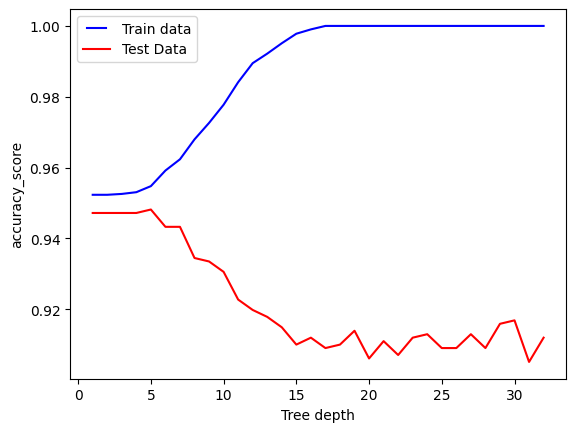

In [207]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

max_depths = range(1, 33)
train_results = []
test_results = []
for max_depth in max_depths:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf = clf.fit(X_train_std, y_train)
    train_pred = clf.predict(X_train_std)
    dt_accuracy = accuracy_score(y_train,  train_pred)
    # Add auc score to previous train results
    train_results.append(dt_accuracy)

    y_pred = clf.predict(X_test_std)
    dt_accuracy = accuracy_score(y_test,  y_pred)
    # Add auc score to previous test results
    test_results.append(dt_accuracy)


line1, = plt.plot(max_depths, train_results, 'b', label="Train data")
line2, = plt.plot(max_depths, test_results, 'r', label="Test Data ")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("accuracy_score")
plt.xlabel("Tree depth")
plt.show()

\*We see that our model overfits for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data


### min_samples_split:

min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples


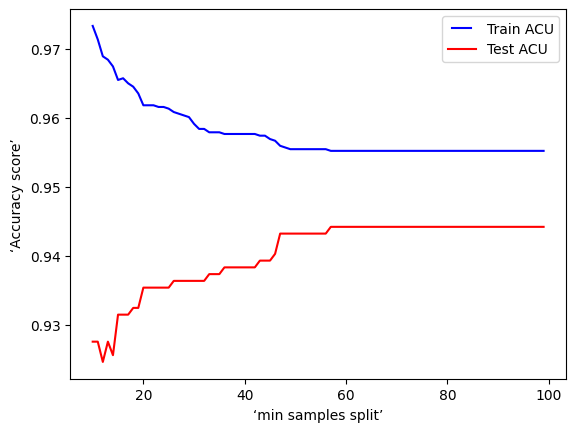

In [208]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

min_samples_splits = range(10, 100)
for i in min_samples_splits:
    i = i / 100

train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    clf = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
    clf = clf.fit(X_train_std, y_train)

    train_pred = clf.predict(X_train_std)
    dt_accuracy = accuracy_score(y_train,  train_pred)
    # Add auc score to previous train results
    train_results.append(dt_accuracy)

    y_pred = clf.predict(X_test_std)
    dt_accuracy = accuracy_score(y_test,  y_pred)
    # Add auc score to previous test results
    test_results.append(dt_accuracy)

line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train ACU")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test ACU")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('‘Accuracy score’')
plt.xlabel('‘min samples split’')
plt.show()

\*Here Changing the value of min sammple split will make error constant after a point.


### min_samples_leaf

min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.


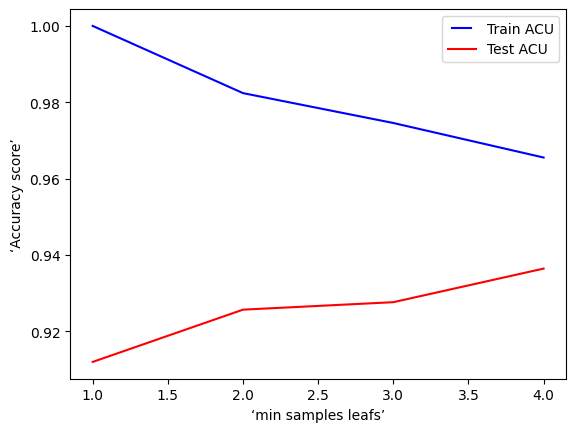

In [209]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

min_samples_leafs = range(1, 5)
for i in min_samples_leafs:
    i = i / 10
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    clf = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    clf = clf.fit(X_train_std, y_train)

    train_pred = clf.predict(X_train_std)
    dt_accuracy = accuracy_score(y_train,  train_pred)
    # Add auc score to previous train results
    train_results.append(dt_accuracy)

    y_pred = clf.predict(X_test_std)
    dt_accuracy = accuracy_score(y_test,  y_pred)
    # Add auc score to previous test results
    test_results.append(dt_accuracy)


line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train ACU")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test ACU")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('‘Accuracy score’')
plt.xlabel('‘min samples leafs’')
plt.show()

\*Here Changing the value of min sample leafs will make error constant after a point.


### max_features

max_features represents the number of features to consider when looking for the best split.


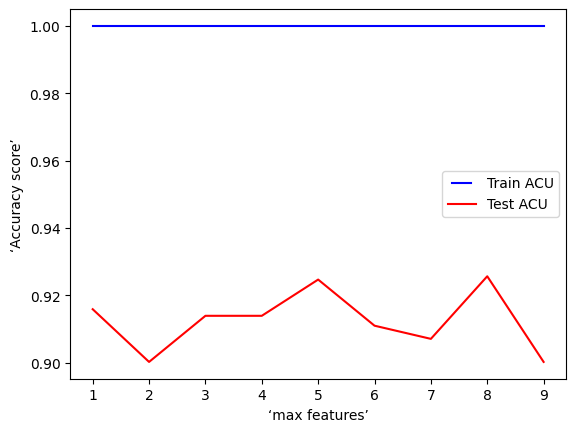

In [210]:
max_features = list(range(1, X_train_std.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    clf = tree.DecisionTreeClassifier(max_features=max_feature)
    clf = clf.fit(X_train_std, y_train)

    train_pred = clf.predict(X_train_std)
    dt_accuracy = accuracy_score(y_train,  train_pred)
    # Add auc score to previous train results
    train_results.append(dt_accuracy)

    y_pred = clf.predict(X_test_std)
    dt_accuracy = accuracy_score(y_test,  y_pred)
    # Add auc score to previous test results
    test_results.append(dt_accuracy)

line1, = plt.plot(max_features, train_results, 'b', label="Train ACU")
line2, = plt.plot(max_features, test_results, 'r', label="Test ACU")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('‘Accuracy score’')
plt.xlabel('‘max features’')
plt.show()

\*max features option changes the accuracy in test data set.


After Considering these options we will use max_features = 4,min sample leaf= 4,min sample split = 80,max depth = 5.


In [211]:
from sklearn.metrics import accuracy_score
from sklearn import tree
clf = tree.DecisionTreeClassifier(
    max_features=4, min_samples_leaf=4, min_samples_split=80, max_depth=5)
clf = clf.fit(X_train_std, y_train)


predicted_test = clf.predict(X_test_std)

# Print the overall model accuracy
dt_accuracy = accuracy_score(y_test, predicted_test)
print('Test Accuracy     : {}'.format(dt_accuracy))

Test Accuracy     : 0.9471624266144814


In [212]:
import pickle as pk
filename = 'model/decisionTree.sav'
pk.dump(clf, open(filename, "wb"))

# logistic regression


In [213]:
# Now we will use logistic regression algorithm to predict the results
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=123)
log_reg.fit(X_train_std, y_train)
Y_preds_lr = log_reg.predict(X_test_std)

In [214]:
Y_preds_lr
# These are the predicted values using logistic regression model

array([0, 0, 0, ..., 0, 0, 0])

In [215]:
# Print the model accuracy
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(y_test, Y_preds_lr)
print('Test Accuracy     : {}'.format(lr_accuracy))

Test Accuracy     : 0.9471624266144814


## Hyperparameter Tuning for Linear Regression


### The best solver:-

we start by selecting the best solver excluding regularization at this stage: {‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’}.


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, roc_curve

clf = [
    LogisticRegression(solver='newton-cg', penalty='l2',
                       C=0.001, max_iter=10000),
    LogisticRegression(solver='lbfgs', penalty='l2', C=0.001, max_iter=10000),
    LogisticRegression(solver='sag', penalty='l2', C=0.001, max_iter=10000),
    LogisticRegression(solver='saga', penalty='l2', C=0.001, max_iter=10000)
]
clf_columns = []
clf_compare = pd.DataFrame(columns=clf_columns)

row_index = 0
for alg in clf:

    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(
        alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(
        alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Precission'] = round(
        precision_score(y_test, predicted), 5)
    clf_compare.loc[row_index, 'Recall'] = round(
        recall_score(y_test, predicted), 5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp), 5)

    row_index += 1

clf_compare.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)
clf_compare

\*AS we can see here newton-cg,l2 and 0.001 and max iteration of 10000 gives us best model accuracy.We use penalty and C value to regulate overfitting.


In [217]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(
    random_state=123, solver='newton-cg', penalty='l2', C=0.001, max_iter=10000)
log_reg.fit(X_train_std, y_train)
Y_preds_lr = log_reg.predict(X_test_std)

In [218]:
# Print the model accuracy
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(y_test, Y_preds_lr)
print('Test Accuracy     : {}'.format(lr_accuracy))

Test Accuracy     : 0.9471624266144814


In [229]:
import pickle as pk
filename = 'model/lr.sav'
pk.dump(clf, open(filename, "wb"))

# KNN Algorithm


In [219]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier = classifier.fit(X_train_std, y_train)

y_pred_KNN = classifier.predict(X_test_std)

In [220]:
y_pred_KNN

array([0, 0, 0, ..., 0, 0, 0])

In [221]:
from sklearn.metrics import accuracy_score
KNN_accuracy = accuracy_score(y_test, y_pred_KNN)
print('Test Accuracy     : {}'.format(KNN_accuracy))

Test Accuracy     : 0.9461839530332681


## HyperParamter Tunning for KNN algorithm


\*We will use three hyperparamters- <h4>n-neighbors, weights and metric.</h4>
n_neighbors: Decide the best k based on the values we have computed earlier.
weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
metric: The distance metric to be used will calculating the similarity


In [225]:
grid_params = {'n_neighbors': [5, 7, 9, 11, 13, 15], 'weights': [
    'uniform', 'distance'], 'metric': ['minkowski', 'euclidean', 'manhattan']}

In [226]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(KNeighborsClassifier(), grid_params,
                  verbose=1, cv=3, n_jobs=-1)
g_res = gs.fit(X_train_std, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [227]:
# find the best score
g_res.best_score_

0.9525441453360238

In [228]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [ ]:
# use the best hyperparameters
knn = KNeighborsClassifier(
    n_neighbors=9, weights='uniform', algorithm='brute', metric='manhattan')
knn = knn.fit(X_train, y_train)

In [231]:
y_pred_KNN = classifier.predict(X_test_std)

In [232]:
from sklearn.metrics import accuracy_score
KNN_accuracy = accuracy_score(y_test, y_pred_KNN)
print('Test Accuracy     : {}'.format(KNN_accuracy))

Test Accuracy     : 0.9461839530332681


In [233]:
# Save the model
import pickle as pk
filename = 'model/KNN.sav'
pk.dump(clf, open(filename, "wb"))

# Random Forest


In [236]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
# Train the model on training data
rf = rf.fit(X_train_std, y_train)
y_pred_RF = rf.predict(X_test_std)

In [239]:
y_pred_RF

array([0, 0, 0, ..., 0, 0, 0])

In [240]:
from sklearn.metrics import accuracy_score
RF_accuracy = accuracy_score(y_test, y_pred_RF)
print('Test Accuracy     : {}'.format(RF_accuracy))

Test Accuracy     : 0.9461839530332681


## HyperParamter Tunning for Random Forest Algorthm


In [245]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_random = rf_random.fit(X_train_std, y_train)

In [247]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [248]:
best_random = rf_random.best_estimator_

In [249]:
y_pred_RF = best_random.predict(X_test_std)

In [250]:
from sklearn.metrics import accuracy_score
RF_accuracy = accuracy_score(y_test, y_pred_RF)
print('Test Accuracy     : {}'.format(RF_accuracy))

Test Accuracy     : 0.9471624266144814


In [251]:
# Save the model
import pickle as pk
filename = 'model/RF.sav'
pk.dump(clf, open(filename, "wb"))

# Support vector Machine(SVM) Algorithm


In [252]:
# Import libraries for support vector machines
from sklearn.svm import SVC

# Create the classifiers
sv = SVC()

# Fit the data
sv = sv.fit(X_train_std, y_train)

# predict the rsults
y_pred_svm = sv.predict(X_test_std)

In [253]:
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0])

In [254]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
SVM_accuracy = accuracy_score(y_test, y_pred_svm)
print('Test Accuracy     : {}'.format(SVM_accuracy))

Test Accuracy     : 0.9471624266144814


#### Now we will plot the different algorithms and then we will check which one will be best for this case.


In [255]:
acc = pd.DataFrame([dt_accuracy, lr_accuracy, KNN_accuracy, RF_accuracy, SVM_accuracy], [
                   'Decision Tree', 'Logistic Regression', 'KNN', 'Random Forest', 'SVM'])
acc.iplot(kind="bar", theme="pearl", title="Check the accuracy scores",
          xTitle='Algorithms', yTitle='Accuracy')

## Now just save your model into disk to actually host the trained model

### <br/> we will host logistic regression model


In [256]:
import pickle as pk
filename = 'model/lr.sav'
pk.dump(log_reg, open(filename, "wb"))

### We can open and use the model in this way


In [257]:
loaded_model = pk.load(open(filename, 'rb'))
result = loaded_model.score(X_test_std, y_test)
print(result)

0.9471624266144814
